3.4.2
(360, 640)
(360, 640)


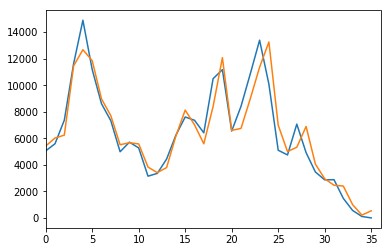

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Utils_plot import plot_hist

print(cv2.__version__)

img = cv2.imread('office_1.jpg')
img_rotate = cv2.imread('office_2.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(img_rotate.shape)

hist = cv2.calcHist([img], [0], None, [36], [0, 256])
hist_r = cv2.calcHist([img_rotate], [0], None, [36], [0, 256])
plt.plot(hist)
plt.plot(hist_r)
plt.xlim([0, 36])
plt.show()

In [2]:
def histogram_gradient(img, img_rotate, mag_thres = 20, bin_num = 360):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

    for img in [img, img_rotate]:
        sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
        sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
        gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
        magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
        mag_thres = np.median(magnitude)
        print(mag_thres)
        gradient = (magnitude > mag_thres) * gradient
        gradient = (gradient < 0) * 360 + gradient
        hist, bins = np.histogram(gradient, bin_num)
        hist = hist[1:]
        
        plt.plot(hist)
    #plt.xlim([1, bin_num])
    #plt.ylim([0, 15000])
    plt.show()
    
img = cv2.imread('dog.jpg')
img_rotate = cv2.imread('dog_rotate.jpg')

histogram_gradient(img, img_rotate)  

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


## Test about the gradient

In [63]:
a = np.eye(5)
m = np.linspace(20, 0, 5)
n = np.linspace(0, 20, 5)
grid = np.meshgrid(m, n)
a = grid[0]
b = grid[1]
print("The a is \n", a)
#filter_kernal = 

sobelx=cv2.Sobel(a, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(a, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

print("---" * 10)
print("The a is \n", b)
sobelx=cv2.Sobel(b, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(b, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

a = np.linspace(-1, 1, 3)
a = np.meshgrid(a, a)
gradient = np.arctan2(a[1], a[0]) * 180 / np.pi
print(a[0])
print(a[1])
print(gradient)

The a is 
 [[20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]]
The sobelx is 
 [[  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]]
The sobely is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The gradient is 
 [[  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]]
------------------------------
The a is 
 [[ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15.]
 [20. 20. 20. 20. 20.]]
The sobelx is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The sobely is 
 [[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]]
The gradient is 
 [[ 0.  0.  0.  0.  0.]
 [90. 90. 90

[[-1.66701619 -0.5412203   1.46172758]
 [-2.39129728  0.64310569  0.46071681]
 [ 1.40189124  0.49331908 -0.80849176]
 [-2.28529149  1.09738477 -0.90333812]
 [ 1.03727192 -0.83296867  1.42432696]]
[[-0.         -0.          1.46172758]
 [-0.          0.          0.        ]
 [ 1.40189124  0.         -0.        ]
 [-0.          1.09738477 -0.        ]
 [ 1.03727192 -0.          1.42432696]]
(10,)


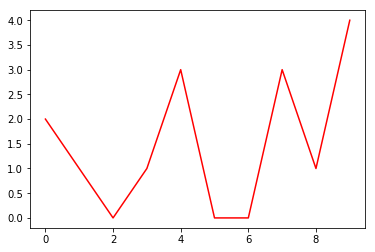

In [58]:
a = np.random.randn(5, 3)
print(a)

print((a > 1) * a)
gradient, bins = np.histogram(a)
print(gradient.shape)

plt.plot(gradient, 'r')

plt.show()

[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [90.     0.    15.266 ... 21.23  28.94  90.   ]
 [90.    45.     0.    ... 26.48  48.6   90.   ]
 ...
 [90.    26.56  81.94  ... 13.39  28.5   90.   ]
 [90.    53.78  55.53  ...  2.246 21.61  90.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


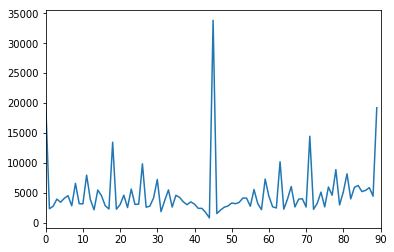

In [43]:
img = np.eye(5)

sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
print(sobelx)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
sobely=cv2.convertScaleAbs(sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print(gradient)

num_bins = 36
hist, bins = np.histogram(gradient.ravel(), 90, [0, 90])

plt.plot(hist)
plt.xlim([0, 90])
plt.show()